In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="/Knee-Torque-ZDataSet.csv"
df=pd.read_csv(path)
df.tail()

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
52,62,1.62,NaN,NaN,9.302,Low
53,65,1.50,NaN,NaN,8.624,Low
54,87,1.87,NaN,NaN,7.012,Very Low
55,77,1.88,NaN,NaN,2.514,Very Low
56,67,1.73,NaN,NaN,20.000,Very High


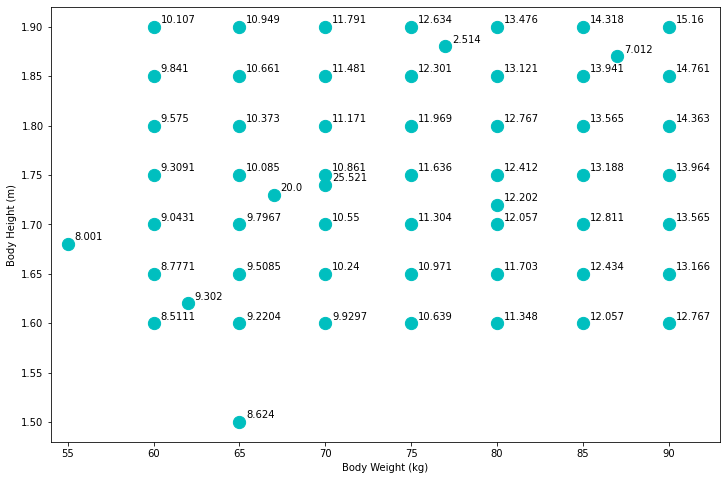

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(df["Body Weight (kg)"], df["Body Height (m)"], s=150, c='c')
plt.axis([54,93,1.48,1.92])
plt.xlabel("Body Weight (kg)")
plt.ylabel("Body Height (m)")
w=df["Body Weight (kg)"].to_numpy()
h=df["Body Height (m)"].to_numpy()
i=0
for v in df["Required Torque (N-m)"].to_numpy():
  plt.text(w[i]+.4,h[i]+.004,v)
  i=i+1

Text(82.4, 1.784, 'New?')

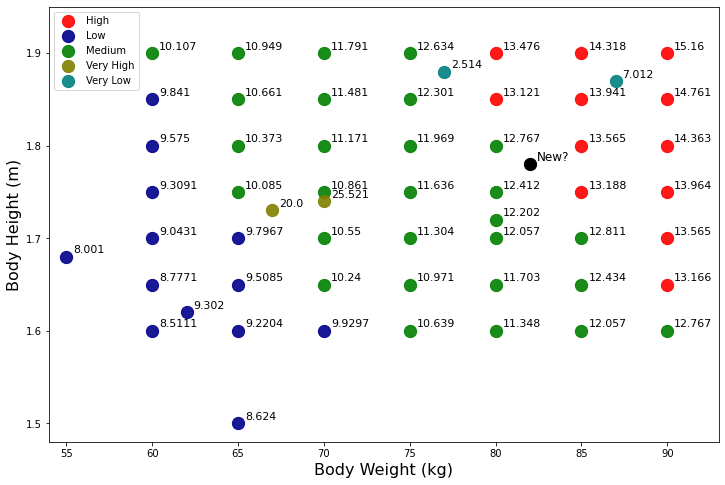

In [4]:
T_CATEGORY=df['Torque Category'].values
T_CATEGORY_=np.unique(T_CATEGORY)
COLORS=["#FF0000","#00008b","#008000","#808000","#008080"]

fig,ax=plt.subplots(figsize=(12,8))
plt.axis([54,93,1.48,1.95])

for category, color in zip(T_CATEGORY_, COLORS ):
  idxs=np.where(T_CATEGORY==category)
  ax.scatter(w[idxs],h[idxs],label=category,s=150,color=color,alpha=0.9)
ax.legend()

font={'family':'sans serif','color':'black','weight':'normal','style':'normal','size':11}
i=0

for v in df["Required Torque (N-m)"].to_numpy():
  plt.text(w[i]+.4,h[i]+.004,v,fontdict=font)
  i=i+1
font={'family':'sans serif','color':'black','weight':'normal','style':'normal','size':16}
ax.set_xlabel("Body Weight (kg)",fontdict=font,fontsize=16)
ax.set_ylabel("Body Height (m)",fontdict=font,fontsize=16)

# New datapoint to be predicted
plt.scatter(82,1.78,s=150,c='#000000')
plt.text(82+.4,1.78+.004,"New?",fontname='sans serif',fontsize=12)

In [6]:
df.isnull().sum()

Body Weight (kg)           0
Body Height (m)            0
Weight-Height Ratio (R)    8
Internal Moment (M)        8
Required Torque (N-m)      0
Torque Category            0
dtype: int64

In [7]:
df1=df.dropna()
df1.tail(10)

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
39,85,1.80,47.222,1.3841,13.565,High
40,85,1.85,45.946,1.4226,13.941,High
41,85,1.90,44.737,1.4610,14.318,High
42,90,1.60,56.250,1.3027,12.767,Medium
43,90,1.65,54.545,1.3434,13.166,High
44,90,1.70,52.941,1.3841,13.565,High
45,90,1.75,51.429,1.4249,13.964,High
46,90,1.80,50.000,1.4656,14.363,High
47,90,1.85,48.649,1.5063,14.761,High
48,90,1.90,47.368,1.5470,15.160,High


In [12]:
y=df1['Required Torque (N-m)']
X=df1.drop(['Weight-Height Ratio (R)','Internal Moment (M)','Required Torque (N-m)','Torque Category'],axis=1)
X.describe()

,Body Weight (kg),Body Height (m)
count,49.00000,49.000000
mean,75.00000,1.750000
std,10.10363,0.101036
min,60.00000,1.600000
25%,65.00000,1.650000
50%,75.00000,1.750000
75%,85.00000,1.850000
max,90.00000,1.900000


In [14]:
X.shape

(49, 2)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(len(X),
len(X_train),
len(X_test),)

49 36 13


In [22]:
X_test2=X_test[:1]
X_test2

,Body Weight (kg),Body Height (m)
13,65,1.9


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_t=X_test
X_t2=X_test2
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_test2=scaler.transform(X_test2)

In [26]:
col_names=['Body Weight (kg)','Body Height (m)']
scaled_df=pd.DataFrame(X_train,columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Body Weight (kg),36.0,-6.106227e-16,1.014185,-1.452736,-0.959354,0.027410,1.014175,1.507557
Body Height (m),36.0,-9.575674e-16,1.014185,-1.263228,-0.757937,-0.252646,0.757937,1.768519


In [28]:
from sklearn.neighbors import KNeighborsRegressor
K=5
regressor=KNeighborsRegressor(n_neighbors=K)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(X_test)
print(y_test)
print(y_pred)

[[-0.95935428  1.76851903]
 [ 1.50755672  0.25264558]
 [ 1.50755672  1.26322788]
 [ 1.50755672 -0.25264558]
 [-0.46597208  0.25264558]
 [ 0.02741012  1.76851903]
 [ 0.02741012  1.26322788]
 [ 0.02741012  0.75793673]
 [ 0.52079232  0.25264558]
 [-0.46597208  1.26322788]
 [-0.95935428  1.26322788]
 [-1.45273648  0.75793673]
 [ 0.52079232  1.76851903]] Hello1
13    10.949
45    13.964
47    14.761
44    13.565
17    10.861
27    12.634
26    12.301
25    11.969
31    12.412
19    11.481
12    10.661
4      9.575
34    13.476
Name: Required Torque (N-m), dtype: float64 Hello2
[10.6566  13.4186  14.2694  12.7312  10.763   13.1876  12.5582  11.8136
 12.6426  11.2594  10.6566  10.15582 13.6662 ] Hello3


In [29]:
y_pred2=regressor.predict(X_test2)
y_pred2

array([10.6566])

In [30]:
pred_df=X_t2
pred_df

,Body Weight (kg),Body Height (m)
13,65,1.9


In [31]:
pred_df['Required Torque (N-m)']=y_pred2
pred_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Body Weight (kg),Body Height (m),Required Torque (N-m)
13,65,1.9,10.6566


In [32]:
from numpy.ma.core import mean
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.3426938461538461
mse: 0.16938923633846145
rmse: 0.41156923638491427


In [33]:
regressor.score(X_test,y_test)

0.9171930701625446

In [34]:
y.describe()

count    49.000000
mean     11.636300
std       1.707826
min       8.511100
25%      10.240000
50%      11.636000
75%      12.811000
max      15.160000
Name: Required Torque (N-m), dtype: float64

In [37]:
error=[]
for i in range(1,30):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  mae=mean_absolute_error(y_test,pred_i)
  error.append(mae)
print(type(error))

<class 'list'>


Text(0, 0.5, 'Mean Absolute Error (MAE)')

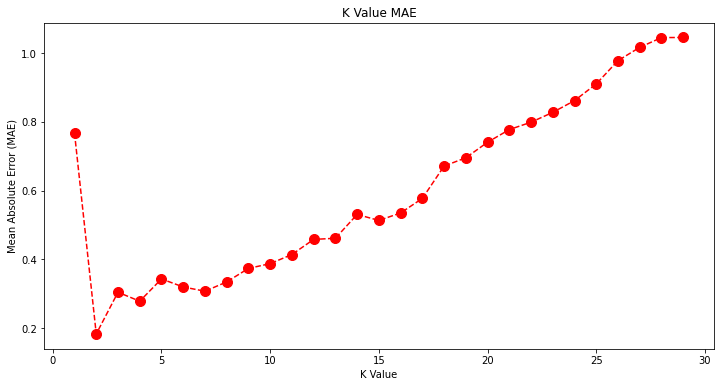

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red',
         linestyle='dashed',marker='o',#markedfacecolor='blue',
         markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)')

In [41]:
import numpy as np
print(min(error[2:]))
print(np.array(error[2:]).argmin()+2)
K_neigh=np.array(error[2:]).argmin()+2

knn_reg=KNeighborsRegressor(n_neighbors=4)
knn_reg.fit(X_train,y_train)
y_pred_reg=knn_reg.predict(X_test)
r2_reg=knn_reg.score(X_test,y_test)

mae_reg=mean_absolute_error(y_test,y_pred_reg)
mse_reg=mean_squared_error(y_test,y_pred_reg)
rmse_reg=mean_squared_error(y_test,y_pred_reg,squared=False)

print(f'r2: {r2_reg}, \nmae: {mae_reg} \nmse: {mse_reg} \nrmse: {rmse_reg}')

0.27790576923077
3
r2: 0.939400126902873, 
mae: 0.27790576923077 
mse: 0.12396264716346174 
rmse: 0.35208329577453934


In [42]:
dfc=df.dropna()

y=dfc['Torque Category']
X=dfc.drop(['Weight-Height Ratio (R)','Internal Moment (M)','Required Torque (N-m)','Torque Category'],axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)


X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
K=5
classifier=KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array(['Medium', 'High', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High'],
      dtype=object)

In [52]:
acc=classifier.score(X_test,y_test)
print(acc)

0.7692307692307693


              precision    recall  f1-score   support

        High       0.75      0.75      0.75         4
         Low       0.00      0.00      0.00         1
      Medium       0.78      0.88      0.82         8

    accuracy                           0.77        13
   macro avg       0.51      0.54      0.52        13
weighted avg       0.71      0.77      0.74        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


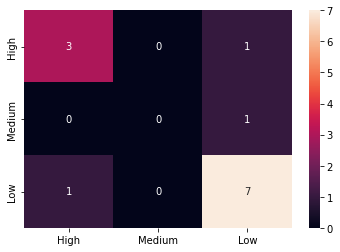

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes_names=['High','Medium','Low']
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=classes_names,
                index=classes_names)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

In [54]:
print(f'Test:{np.array(y_test)} \n')
print(f'Pred:{y_pred}')

Test:['Medium' 'High' 'High' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Low' 'High'] 

Pred:['Medium' 'High' 'High' 'Medium' 'Medium' 'High' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High']


Text(0, 0.5, 'F1 Score')

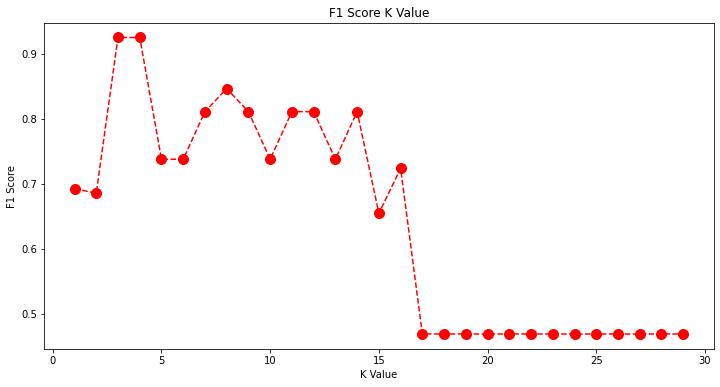

In [55]:
from sklearn.metrics import f1_score
f1s=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  f1s.append(f1_score(y_test,pred_i,average='weighted'))

plt.figure(figsize=(12,6))
plt.plot(range(1,30),f1s,color='red',linestyle='dashed',marker='o',markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [56]:
np.array(f1s)

array([0.69230769, 0.68531469, 0.92478632, 0.92478632, 0.73755656,
       0.73755656, 0.81074481, 0.84615385, 0.81074481, 0.73755656,
       0.81074481, 0.81074481, 0.73755656, 0.81074481, 0.65445665,
       0.72334683, 0.46886447, 0.46886447, 0.46886447, 0.46886447,
       0.46886447, 0.46886447, 0.46886447, 0.46886447, 0.46886447,
       0.46886447, 0.46886447, 0.46886447, 0.46886447])

In [57]:
classifier7=KNeighborsClassifier(n_neighbors=7)
classifier7.fit(X_train,y_train)
y_pred7=classifier.predict(X_test)
y_pred7
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

        High       0.75      0.75      0.75         4
         Low       0.00      0.00      0.00         1
      Medium       0.78      0.88      0.82         8

    accuracy                           0.77        13
   macro avg       0.51      0.54      0.52        13
weighted avg       0.71      0.77      0.74        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
classifier11=KNeighborsClassifier(n_neighbors=11)
classifier11.fit(X_train,y_train)
y_pred11=classifier.predict(X_test)
y_pred11
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

        High       0.75      0.75      0.75         4
         Low       0.00      0.00      0.00         1
      Medium       0.78      0.88      0.82         8

    accuracy                           0.77        13
   macro avg       0.51      0.54      0.52        13
weighted avg       0.71      0.77      0.74        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.neighbors import NearestNeighbors

nbrs=NearestNeighbors(n_neighbors=5)
nbrs.fit(X_train)
distances,indexes=nbrs.kneighbors(X_train)
distances[:3],distances.shape

(array([[0.        , 0.4933822 , 0.4933822 , 0.50529115, 0.50529115],
        [0.        , 0.4933822 , 0.50529115, 0.70621891, 0.70621891],
        [0.        , 0.50529115, 0.9867644 , 1.12458997, 1.41243781]]),
 (36, 5))

In [60]:
indexes[:3],indexes[:3].shape

(array([[ 0, 19,  6, 31,  7],
        [ 1, 26, 21, 17,  7],
        [ 2, 15, 30, 17, 28]]), (3, 5))

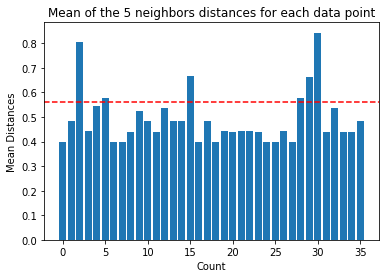

In [61]:
dist_means=distances.mean(axis=1)
plt.bar(np.array(range(0,36)),dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

plt.axhline(y=0.56,color='r',linestyle='--')

In [62]:
import numpy as np

outlier_index=np.where(dist_means>0.56)
outlier_index

(array([ 2,  5, 15, 28, 29, 30]),)

In [63]:
outlier_values=df1.iloc[outlier_index]
outlier_values

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
2,60,1.70,35.294,0.92276,9.0431,Low
5,60,1.85,32.432,1.00420,9.8410,Low
15,70,1.65,42.424,1.04490,10.2400,Medium
28,80,1.60,50.000,1.15800,11.3480,Medium
29,80,1.65,48.485,1.19420,11.7030,Medium
30,80,1.70,47.059,1.23040,12.0570,Medium
